Importing The Necessary Libraries:

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


# Importing Dataset:


In [206]:
df = pd.read_excel("/Users/shubh/Downloads/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Exploratory Data Analysis (EDA):

In [207]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Getting Information Of Dataset:

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [209]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Describing The Dataset to Know More :

In [210]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Checking For Null Values In Dataset:

In [211]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [212]:
df.isnull().sum().any()

True

Dropping The NAN Values:

In [213]:
df.dropna(inplace= True)

In [214]:
df[df.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


Here we will be removing those repeated values from the dataset and keeping the in-place attribute to be true so that there will be no changes.



In [215]:
df.drop_duplicates(keep= 'first',inplace= True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [216]:
df.shape

(10462, 11)

Checking the Additional_info column and having the count of unique types of values.



In [217]:
df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Checking the different Airlines :

In [218]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [219]:
df['Airline'].unique()


array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

Checking Diffrent Airline Routes:

In [220]:
df["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

# Data Visualization:

A] visualization with Price vs Airline:

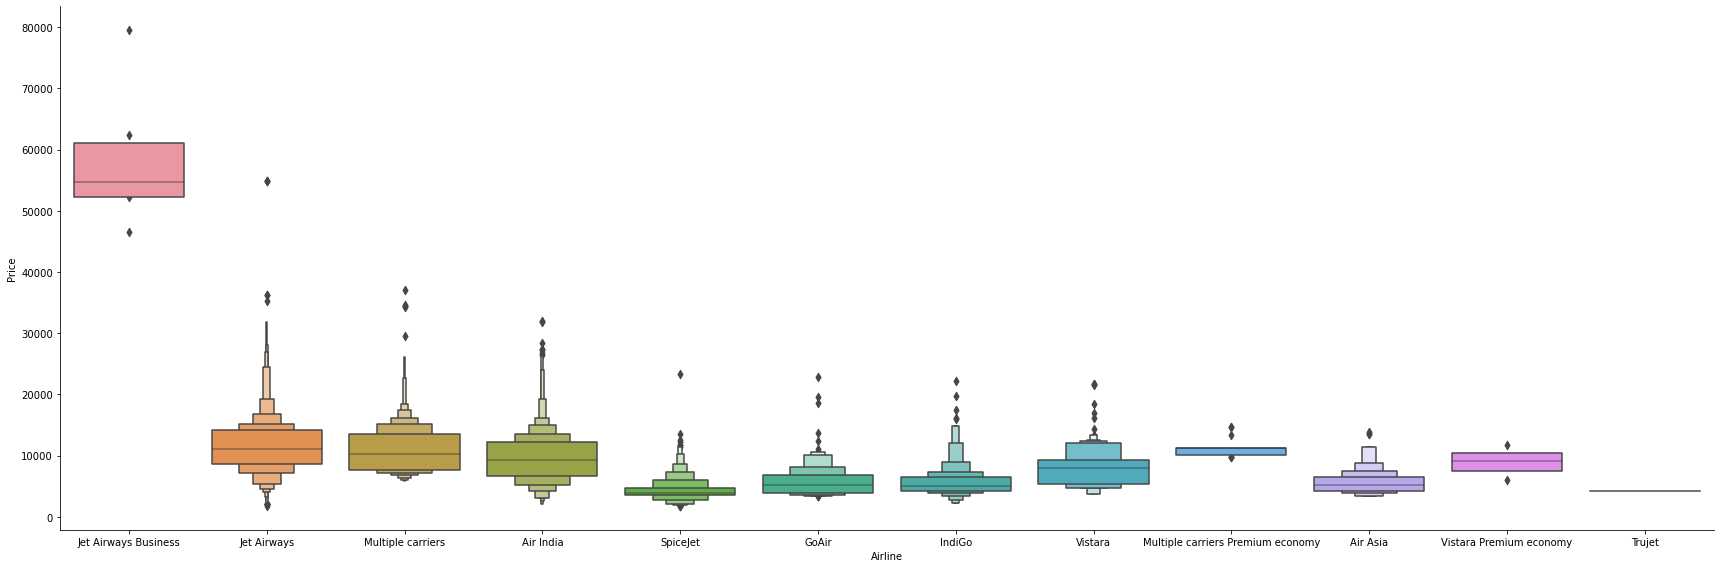

In [221]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

Here with the help of the cat plot we are trying to plot the boxplot between the price of the flight and airline and we can conclude that Jet Airways has the most outliers in terms of price.

B] Visualization for Price vs Source:



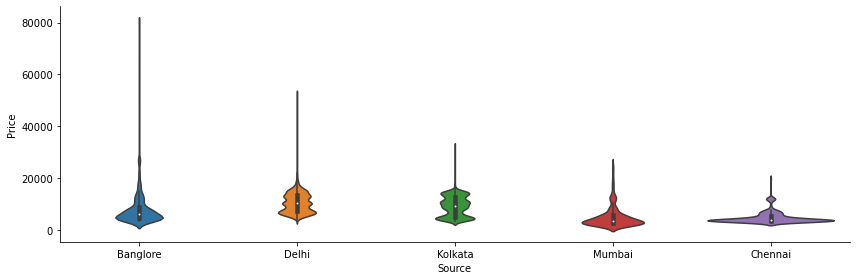

In [222]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

Now with the help of cat plot only we are plotting a box plot between the price of the flight and the source place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers while Chennai has the least.

C] Visualizaton for Price vs Destination:

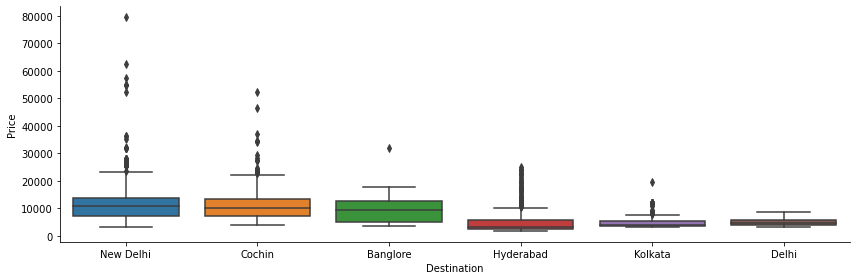

In [223]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

Here we are plotting the box plot with the help of a cat plot between the price of the flight and the destination to which the passenger is travelling and figured out that New Delhi has the most outliers and Kolkata has the least.

# Feature Engineering:

Lets See Our Data:

In [224]:
df.head(15)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


Here we are dividing the features and labels and then converting the hours in minutes.



In [225]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

Similarly, we can extract ‘Departure_Hour’ and ‘Departure_Minute’ as well as ‘Arrival_Hour and ‘Arrival_Minute’ from ‘Dep_Time’ and ‘Arrival_Time’ variables respectively.

In [226]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [227]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)


In [228]:
df.head(15)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15


D] Visualizaton of  Bar chart for Months (Duration) vs Number of Flights:

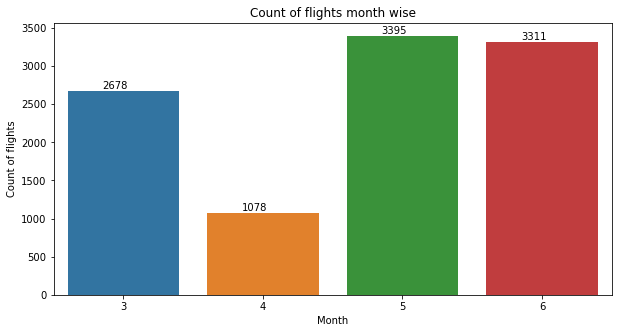

In [229]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

Here in the above graph we have plotted the count plot for journey in a month vs several flights and got to see that May has the most number of flights.

E] Visualization of  Bar chart for Types of Airline vs Number of Flights

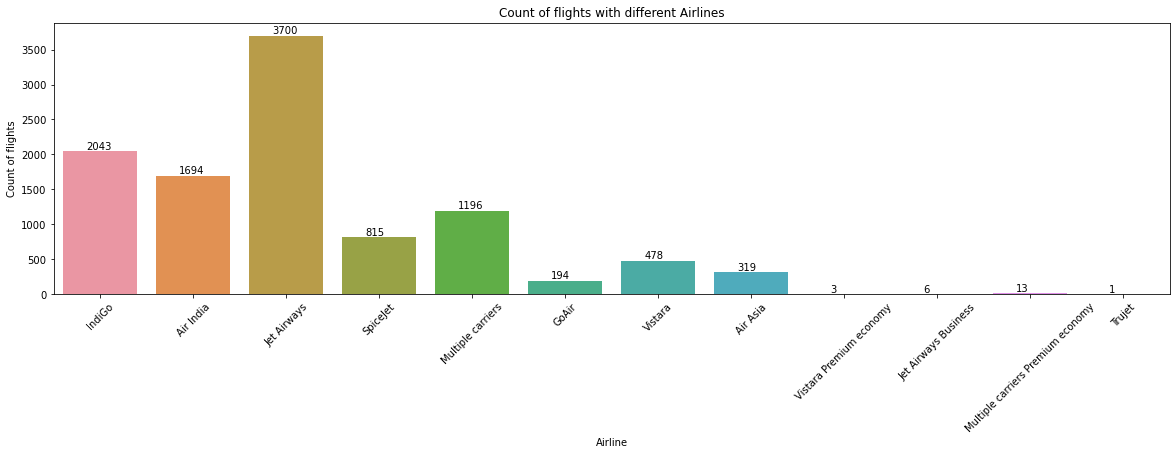

In [230]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')


Now from the above graph we can see that between the type of airline and count of flights we can see that Jet Airways has the most flight boarded.

F] Visualizaton of Ticket Price vs Airlines:

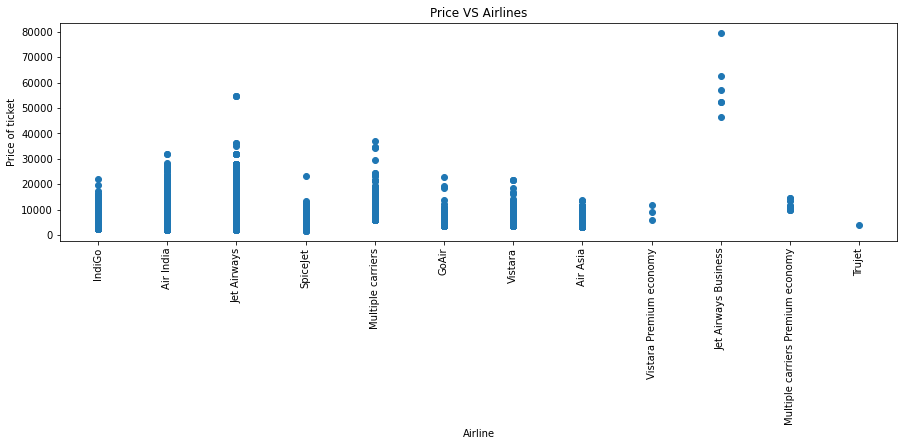

In [231]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90);

# Checking For Correlation:

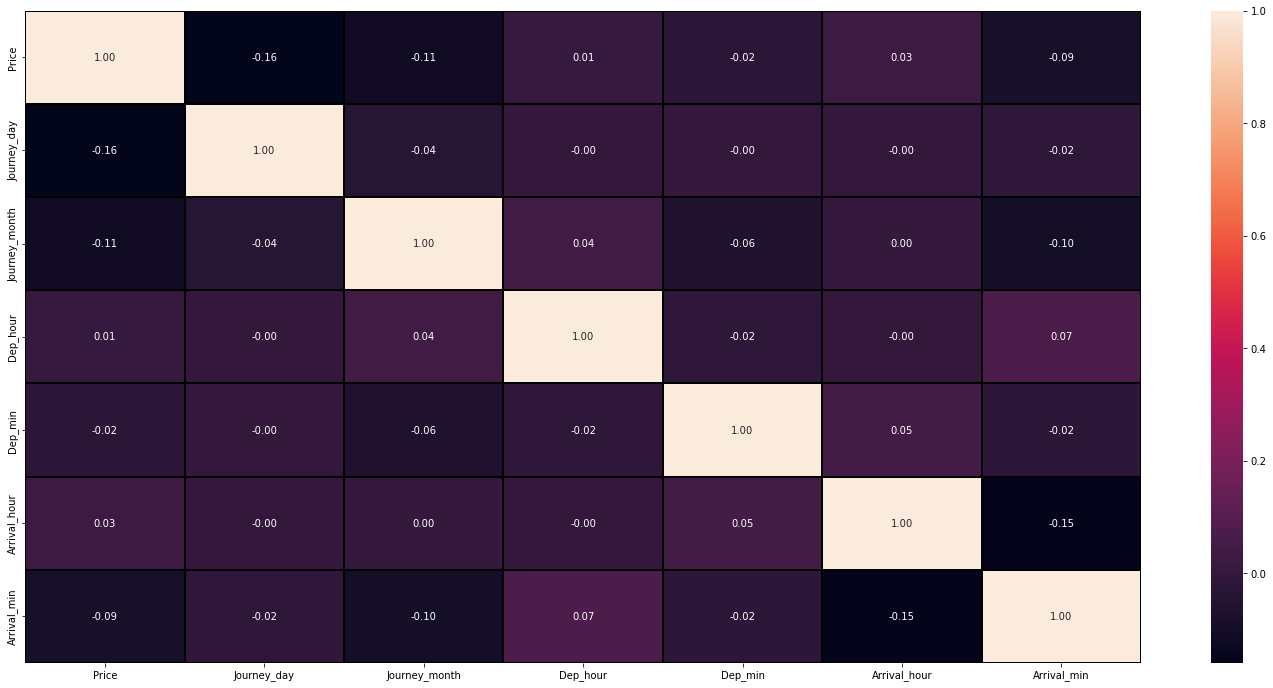

In [232]:
plt.figure(figsize=(25,12))


sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f');

# Using the Label Encoder Technique:

Dealing with Categorical Data and Numerical Data



In [233]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column]= LabelEncoder().fit_transform(df[column])
        
    


In [234]:
df.dtypes

Airline            int64
Source             int64
Destination        int64
Route              int64
Duration           int64
Total_Stops        int64
Additional_Info    int64
Price              int64
Journey_day        int64
Journey_month      int64
Dep_hour           int64
Dep_min            int64
Arrival_hour       int64
Arrival_min        int64
dtype: object

In [235]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,240,4,8,65,8,0,22,4,1,2
1,1,3,0,84,336,1,8,669,0,2,5,10,13,3
2,4,2,1,118,106,1,8,1537,3,3,9,5,4,5
3,3,3,0,91,311,0,8,389,4,2,18,1,23,6
4,3,0,5,29,303,0,8,1457,0,0,16,10,21,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,236,4,8,81,3,1,19,11,22,5
10679,1,3,0,64,237,4,8,84,9,1,20,9,23,4
10680,4,0,2,18,280,4,8,604,9,1,8,4,11,4
10681,10,0,5,18,238,4,8,1377,0,0,11,6,14,2


# Sperating The Target Variable:

In [236]:
x=df.drop("Price",axis=1)



y=df["Price"]

In [237]:
x

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,240,4,8,8,0,22,4,1,2
1,1,3,0,84,336,1,8,0,2,5,10,13,3
2,4,2,1,118,106,1,8,3,3,9,5,4,5
3,3,3,0,91,311,0,8,4,2,18,1,23,6
4,3,0,5,29,303,0,8,0,0,16,10,21,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,236,4,8,3,1,19,11,22,5
10679,1,3,0,64,237,4,8,9,1,20,9,23,4
10680,4,0,2,18,280,4,8,9,1,8,4,11,4
10681,10,0,5,18,238,4,8,0,0,11,6,14,2


In [238]:
y

0          65
1         669
2        1537
3         389
4        1457
         ... 
10678      81
10679      84
10680     604
10681    1377
10682    1262
Name: Price, Length: 10462, dtype: int64

# Checking For Skewness:

In [239]:
# Calculating Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [240]:
df.skew()

Airline            0.723567
Source            -0.419669
Destination        1.225081
Route             -0.481865
Duration          -0.227148
Total_Stops        0.617105
Additional_Info   -1.796501
Price              0.142810
Journey_day        0.073668
Journey_month     -0.377535
Dep_hour           0.108306
Dep_min            0.171301
Arrival_hour      -0.378978
Arrival_min        0.110802
dtype: float64

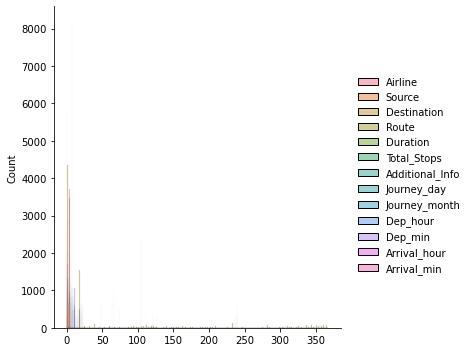

In [241]:

x.skew().sort_values(ascending=False)
sns.displot(x);

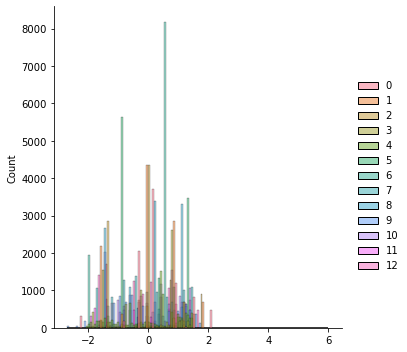

In [242]:
from sklearn.preprocessing import power_transform

x_new = power_transform(x)
sns.displot(x_new);



Validating The Skewness Is Removed Or Not:

# Checking For Outliners:

In [243]:
# checking for the outliners  

# Removing the outliers:

# Z Score Technique:

from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape




(10462, 13)

In [244]:
threshold=3
print(np.where(z>3))

(array([  784,  1042,  2068,  2393,  2469,  2483,  2543,  2904,  3010,
        3088,  3667,  3753,  4476,  4960,  5312,  5563,  5954,  6262,
        6497,  7620,  8815,  8875,  9480, 10159, 10301]), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6]))


In [245]:
x_new=x[(z<3).all(axis=1)]
print(x.shape)
print(x_new.shape)

(10462, 13)
(10437, 13)


In [246]:
# checking the still outliers are present or not if they ARE present the they help in testing model or not



from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

Airline             True
Source              True
Destination         True
Route               True
Duration            True
Total_Stops         True
Additional_Info    False
Journey_day         True
Journey_month       True
Dep_hour            True
Dep_min             True
Arrival_hour        True
Arrival_min         True
dtype: bool

Here there is only one outliner present in the Additional_Info Column, So that this outliner can be neglected.

# Splitting The Data:

In [247]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [248]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 0)

# Finding The Best Model:

A] Linear Regression:

In [249]:
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred_test = lr.predict(x_test)
    pred_train = lr.predict(x_train)
    
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_train, pred_train)}")
    print(f"At randoom stae {i}, the training accuracy is:- {r2_score(y_test, pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.4557806551025847
At randoom stae 0, the training accuracy is:- 0.4768261039435998


At random state 1, the training accuracy is:- 0.45465619845655725
At randoom stae 1, the training accuracy is:- 0.48232819519519765


At random state 2, the training accuracy is:- 0.4608082778542455
At randoom stae 2, the training accuracy is:- 0.45766349653542104


At random state 3, the training accuracy is:- 0.46110163803346416
At randoom stae 3, the training accuracy is:- 0.45621294527670453


At random state 4, the training accuracy is:- 0.46119750575118323
At randoom stae 4, the training accuracy is:- 0.4557688335822754


At random state 5, the training accuracy is:- 0.459389707359378
At randoom stae 5, the training accuracy is:- 0.46369791515420333


At random state 6, the training accuracy is:- 0.46284504709697494
At randoom stae 6, the training accuracy is:- 0.44885701712960346


At random state 7, the training accuracy is:- 0.4561979507966074
At 

In [250]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 33)

In [251]:
lr.fit(x_train, y_train)

LinearRegression()

In [252]:
pred_test = lr.predict(x_test)

In [253]:
print(r2_score(y_test, pred_test))

0.4761565247967088


here r2_score of our model is 93.33 which is good one.

# B] Lasso Regression:

In [254]:
# Performing GridSearchCV on Lasso Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error as mse


params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor = GridSearchCV(Lasso(), params ,cv = 15,scoring = 'neg_mean_absolute_error', n_jobs = -1)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [255]:
# Predicting train and test results
y_train_pred = lasso_regressor.predict(x_train)
y_test_pred = lasso_regressor.predict(x_test)

In [256]:
print("Train Results for Lasso Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
# print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
Root Mean Squared Error:  419.9460638629006
R-Squared:  0.45620578010782653


In [257]:
print("Test Results for Lasso Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Lasso Regressor Model:
Root Mean squared Error:  410.630063495566
Mean Absolute % Error:  233
R-Squared:  0.4761565221776447


# Decision Tree Regression:

In [258]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



In [259]:
# Performing GridSearchCV on Decision Tree Regression
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [260]:
# Predicting train and test results
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

In [261]:
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))


Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  81.98034543677413
R-Squared:  0.9792763120130799


In [262]:
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  184.10617250529293
Mean Absolute % Error:  22
R-Squared:  0.8946979671887378


From Above Three Models We Find The Best Accuracy in the DECISION TREE REGRESSOR.


# Model Saving:

In [263]:
# model Saving

import pickle
filename = 'price.pkl'
pickle.dump(lr, open(filename, 'wb'))

# Conclusion:

In [264]:
# Conclusion

import numpy as np
a = np.array(y_test)
predicated = np.array(tree.predict(x_test))
df_com = pd.DataFrame({'original':a, "predicted":predicated}, index=range(len(a)))
df_com

,original,predicted
0,1772,1590.000000
1,1087,702.000000
2,507,687.500000
3,41,41.000000
4,229,331.153846
...,...,...
2088,127,28.000000
2089,1715,1697.250000
2090,1050,1182.192308
2091,103,103.000000
